In [3]:
!pip install tensorflow==2.13.0

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


# Data Preprocessing

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
import matplotlib.pyplot as plt
from IPython.display import HTML

In [7]:
IMAGE_SIZE=256 #each side
BATCH_SIZE=32 #A standard batch size
CHANNELS=3 #RGB color channel
EPOCHS=50

In [8]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset) #68*32 that means 68 of batches of 32

68

In [11]:
68*32

2176

In [12]:
type(dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

In [13]:
print(dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [14]:
for image_batch,label_batch in dataset.take(3):
    print(image_batch.shape) #me - 32 images, 256*256 pixels, 3 RGB color channels
    print(label_batch.numpy()) #Class of each image represented by 0,1,2
    # 0 - 'Potato___Early_blight'
    # 1 - 'Potato___Late_blight'
    # 2 - 'Potato___healthy'

(32, 256, 256, 3)
[1 2 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 2 2 0 0 0 0 1]
(32, 256, 256, 3)
[1 1 1 2 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 2 0 1 0 1 1 1 1]
(32, 256, 256, 3)
[1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 2 0 0 1 1 0 1 2 0 0 2 1 0 0]


In [15]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0]) #0 means the 1st image out of the 32

tf.Tensor(
[[[116. 107. 112.]
  [111. 102. 107.]
  [ 98.  89.  94.]
  ...
  [105.  94. 100.]
  [112. 101. 107.]
  [118. 107. 113.]]

 [[121. 112. 117.]
  [116. 107. 112.]
  [125. 116. 121.]
  ...
  [ 98.  87.  93.]
  [106.  95. 101.]
  [102.  91.  97.]]

 [[111. 102. 107.]
  [106.  97. 102.]
  [115. 106. 111.]
  ...
  [ 92.  81.  87.]
  [106.  95. 101.]
  [ 91.  80.  86.]]

 ...

 [[166. 159. 166.]
  [162. 155. 162.]
  [161. 154. 161.]
  ...
  [155. 149. 153.]
  [154. 148. 152.]
  [154. 148. 152.]]

 [[169. 162. 169.]
  [165. 158. 165.]
  [163. 156. 163.]
  ...
  [156. 150. 154.]
  [155. 149. 153.]
  [154. 148. 152.]]

 [[169. 162. 169.]
  [166. 159. 166.]
  [165. 158. 165.]
  ...
  [159. 153. 157.]
  [159. 153. 157.]
  [159. 153. 157.]]], shape=(256, 256, 3), dtype=float32)


In [16]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[165. 161. 175.]
  [166. 162. 176.]
  [167. 163. 177.]
  ...
  [138. 132. 146.]
  [138. 132. 146.]
  [135. 129. 143.]]

 [[165. 161. 175.]
  [165. 161. 175.]
  [166. 162. 176.]
  ...
  [142. 136. 150.]
  [143. 137. 151.]
  [141. 135. 149.]]

 [[169. 165. 179.]
  [168. 164. 178.]
  [167. 163. 177.]
  ...
  [137. 131. 145.]
  [137. 131. 145.]
  [134. 128. 142.]]

 ...

 [[159. 155. 170.]
  [160. 156. 171.]
  [160. 156. 171.]
  ...
  [114. 106. 121.]
  [110. 102. 117.]
  [106.  98. 113.]]

 [[157. 153. 168.]
  [159. 155. 170.]
  [160. 156. 171.]
  ...
  [107.  99. 114.]
  [108. 100. 115.]
  [108. 100. 115.]]

 [[155. 151. 166.]
  [158. 154. 169.]
  [159. 155. 170.]
  ...
  [102.  94. 109.]
  [107.  99. 114.]
  [109. 101. 116.]]]


In [17]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [18]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0][0])

tf.Tensor(
[[123. 111. 115.]
 [112. 100. 104.]
 [119. 107. 111.]
 [116. 104. 108.]
 [129. 117. 121.]
 [118. 106. 110.]
 [131. 119. 123.]
 [138. 126. 130.]
 [118. 106. 110.]
 [121. 109. 113.]
 [115. 103. 107.]
 [136. 124. 128.]
 [131. 119. 123.]
 [144. 132. 136.]
 [128. 116. 120.]
 [128. 116. 120.]
 [127. 115. 119.]
 [111.  99. 103.]
 [112. 100. 104.]
 [103.  91.  95.]
 [124. 112. 116.]
 [120. 108. 112.]
 [137. 125. 129.]
 [138. 126. 130.]
 [119. 107. 111.]
 [126. 114. 118.]
 [118. 106. 110.]
 [131. 119. 123.]
 [117. 105. 109.]
 [130. 118. 122.]
 [122. 110. 114.]
 [129. 117. 119.]
 [133. 118. 121.]
 [137. 123. 123.]
 [133. 119. 119.]
 [142. 128. 128.]
 [111.  97.  97.]
 [120. 106. 106.]
 [121. 107. 107.]
 [131. 117. 117.]
 [128. 114. 114.]
 [131. 117. 117.]
 [131. 117. 117.]
 [126. 112. 112.]
 [124. 110. 110.]
 [126. 112. 112.]
 [127. 113. 113.]
 [126. 112. 112.]
 [123. 109. 109.]
 [126. 112. 112.]
 [128. 114. 114.]
 [129. 115. 115.]
 [130. 116. 116.]
 [130. 116. 116.]
 [122. 108. 108.]

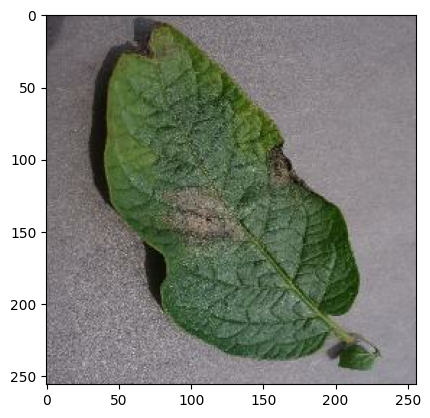

In [19]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

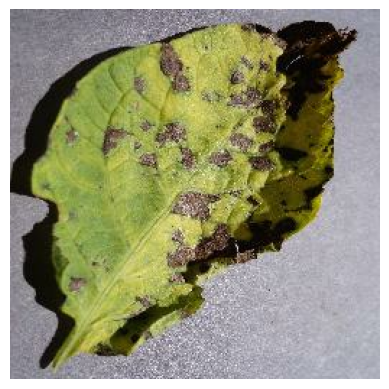

In [20]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off") #remove axis

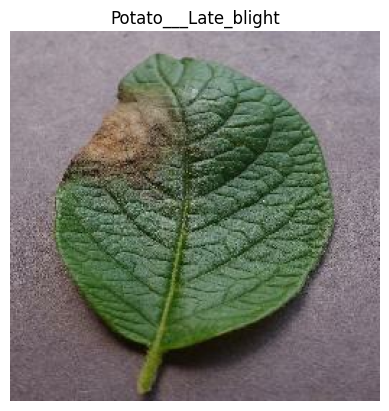

In [21]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    #plt.title(label_batch[0])
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

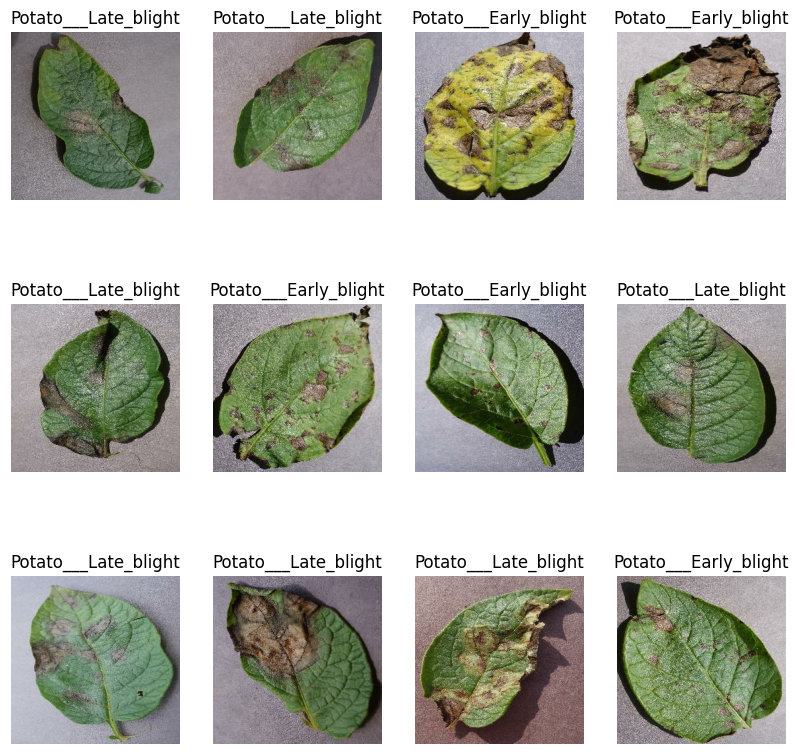

In [22]:
#display deveral images
plt.figure(figsize=(10,10)) #to increase area of each image to avoid overlapping
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [23]:
len(dataset)

68

In [24]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [25]:
train_size=0.8
#dataset.take(10) #takes first 10 samples
len(dataset)*train_size

54.400000000000006

In [26]:
train_ds=dataset.take(54) #takes first 54 samples #arr[:54]
len(train_ds)

54

In [27]:
test_ds=dataset.skip(54) #54 onwards arr[54:]
len(test_ds) #temporary test_ds with both val_ds and test_ds

14

In [28]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [29]:
val_ds=dataset.take(6) #takes first 54 samples #arr[:54]
len(val_ds)

6

In [30]:
test_ds=test_ds.skip(6) #54 onwards arr[54:]
len(test_ds)

8

In [30]:
#Actual function to split

def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
#     test_size=int(ds_size*test_split)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [31]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [32]:
len(train_ds)

54

In [33]:
len(val_ds)

6

In [34]:
len(test_ds)

8

In [35]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [36]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [37]:
#For new tensorflow versions

# resize_and_rescale = tf.keras.Sequential([
#     tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#     tf.keras.layers.Rescaling(1.0 / 255)
# ])

In [38]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Convolutional Neural Network

In [39]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

IMAGE_SIZE

256

In [40]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    # first convolution layer
    layers.Conv2D(32, (3, 3), activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
 
    # second convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # third convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # fourth convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # fifth convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # sixth convolution layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
 
    # fully connected classification
    # single vector
    layers.Flatten(),
        
    # hidden layer and output layer
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

In [41]:
model.build(input_shape=input_shape)

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [43]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [44]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 138s 2s/step - loss: 0.8990 - accuracy: 0.5023 - val_loss: 0.8466 - val_accuracy: 0.5990
Epoch 2/50
54/54 [==============================] - 115s 2s/step - loss: 0.6574 - accuracy: 0.6991 - val_loss: 0.5408 - val_accuracy: 0.7656
Epoch 3/50
54/54 [==============================] - 113s 2s/step - loss: 0.3890 - accuracy: 0.8571 - val_loss: 0.3001 - val_accuracy: 0.9062
Epoch 4/50
54/54 [==============================] - 112s 2s/step - loss: 0.3073 - accuracy: 0.8796 - val_loss: 0.3519 - val_accuracy: 0.8542
Epoch 5/50
54/54 [==============================] - 116s 2s/step - loss: 0.3545 - accuracy: 0.8513 - val_loss: 0.3356 - val_accuracy: 0.8490
Epoch 6/50
54/54 [==============================] - 122s 2s/step - loss: 0.2655 - accuracy: 0.9016 - val_loss: 0.2583 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 120s 2s/step - loss: 0.2112 - accuracy: 0.9196 - val_loss: 0.2393 - val_accuracy: 0.8958
Epoch 8/50
54

In [45]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 6s 357ms/step - loss: 0.0677 - accuracy: 0.9883


In [46]:
scores

[0.06768873333930969, 0.98828125]

In [47]:
history

In [48]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
history.history['accuracy']

[0.5023148059844971,
 0.6990740895271301,
 0.8570601940155029,
 0.8796296119689941,
 0.8512731194496155,
 0.9016203880310059,
 0.9195601940155029,
 0.9103009104728699,
 0.9241898059844971,
 0.9461805820465088,
 0.9317129850387573,
 0.9450231194496155,
 0.9537037014961243,
 0.9728009104728699,
 0.9467592835426331,
 0.9589120149612427,
 0.9629629850387573,
 0.9675925970077515,
 0.9606481194496155,
 0.9756944179534912,
 0.9618055820465088,
 0.9751157164573669,
 0.9728009104728699,
 0.9710648059844971,
 0.9762731194496155,
 0.9884259104728699,
 0.9791666865348816,
 0.9762731194496155,
 0.9820601940155029,
 0.984375,
 0.9745370149612427,
 0.9837962985038757,
 0.9861111044883728,
 0.9780092835426331,
 0.9675925970077515,
 0.9791666865348816,
 0.9837962985038757,
 0.9901620149612427,
 0.9901620149612427,
 0.9924768805503845,
 0.9693287014961243,
 0.9895833134651184,
 0.9890046119689941,
 0.9942129850387573,
 0.9953703880310059,
 0.9895833134651184,
 0.9942129850387573,
 0.9675925970077515,
 0

In [51]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

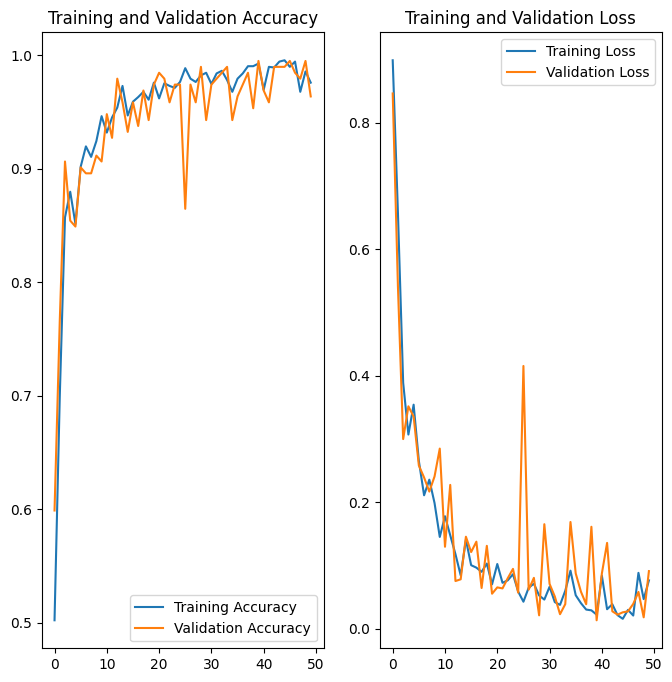

In [52]:
plt.figure(figsize=(8,8))

#Training and Validation Accuracy
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [53]:
for images_batch, labels_batch in test_ds.take(1): #take only te 1st batch
    #images_batch elements are tensors. to turn them into numpy we can use .numpy()
    first_image=images_batch[0].numpy().astype('uint8')
first_image

array([[[113, 109, 123],
        [115, 111, 125],
        [120, 116, 130],
        ...,
        [135, 132, 143],
        [127, 124, 135],
        [132, 129, 140]],

       [[116, 112, 126],
        [117, 113, 127],
        [116, 112, 126],
        ...,
        [138, 135, 146],
        [120, 117, 128],
        [119, 116, 127]],

       [[121, 117, 131],
        [122, 118, 132],
        [121, 117, 131],
        ...,
        [146, 143, 154],
        [139, 136, 147],
        [141, 138, 149]],

       ...,

       [[192, 190, 201],
        [185, 183, 194],
        [193, 191, 202],
        ...,
        [193, 195, 207],
        [188, 190, 202],
        [184, 186, 198]],

       [[187, 185, 196],
        [196, 194, 205],
        [204, 202, 213],
        ...,
        [192, 194, 206],
        [192, 194, 206],
        [192, 194, 206]],

       [[192, 190, 201],
        [206, 204, 215],
        [205, 203, 214],
        ...,
        [188, 190, 202],
        [193, 195, 207],
        [197, 199, 211]]

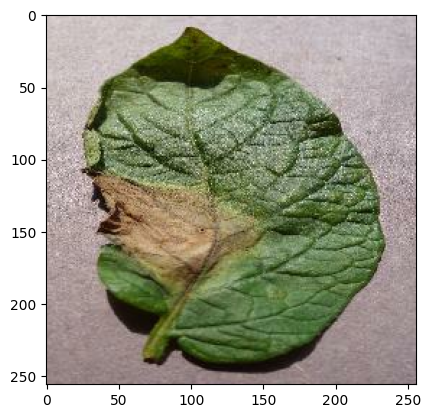

In [54]:
for images_batch, labels_batch in test_ds.take(1): #take only te 1st batch
    #images_batch elements are tensors. to turn them into numpy we can use .numpy()
    plt.imshow(images_batch[0].numpy().astype('uint8'))


first image to predict
first image's actual label :  0
first image's class type :  Potato___Early_blight
1/1 [==============================] - 0s 422ms/step
[9.9986124e-01 1.3877290e-04 2.6275246e-11]
Index of the class with the highest value :  0
Class name of the class with the highest value :  Potato___Early_blight


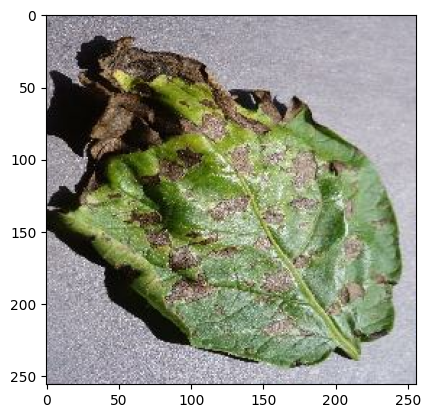

In [60]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1): #take only te 1st batch
    #images_batch elements are tensors. to turn them into numpy we can use .numpy()
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    
    print("first image's actual label : ",first_label)
    print("first image's class type : ",class_names[first_label])

    batch_prediction=model.predict(images_batch) #For the whole batch
    print(batch_prediction[0]) #Prediction only for the first image
    #here you will see 3 values. The highest value is the correct class of the leaf
    
    print("Index of the class with the highest value : ",np.argmax(batch_prediction[0]))
    print("Class name of the class with the highest value : ",class_names[np.argmax(batch_prediction[0])])

In [61]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

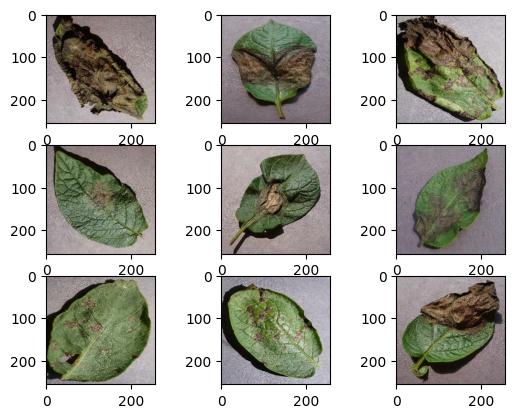

In [63]:
for images, labels in test_ds.take(1):
    for i in range(9):
#         plt.imshow(images[i].numpy().astype("uint8")) #Only shows one image
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

1/1 [==============================] - 0s 41ms/step


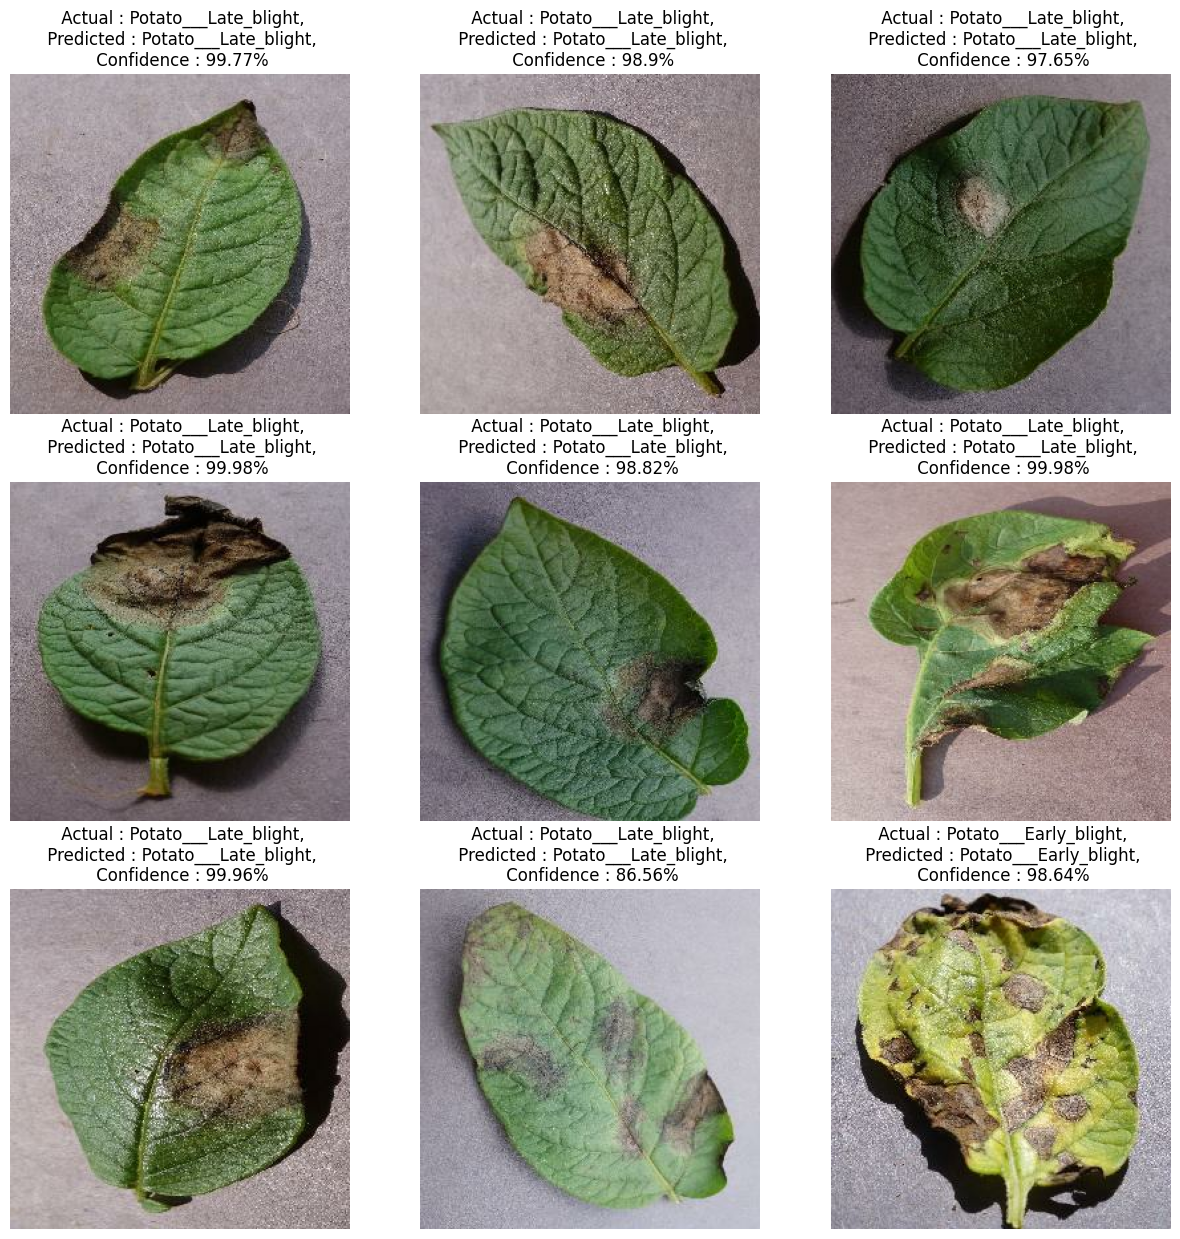

In [68]:
plt.figure(figsize=(15,15)) #to make image size bigger
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f" Actual : {actual_class},\n Predicted : {predicted_class},\n Confidence : {confidence}%")
        
        plt.axis("off")

In [71]:
import os
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [70]:
# model.save(f"../models/{model_version}")
# model_version=1


INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
